In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

## Assignment 1a)

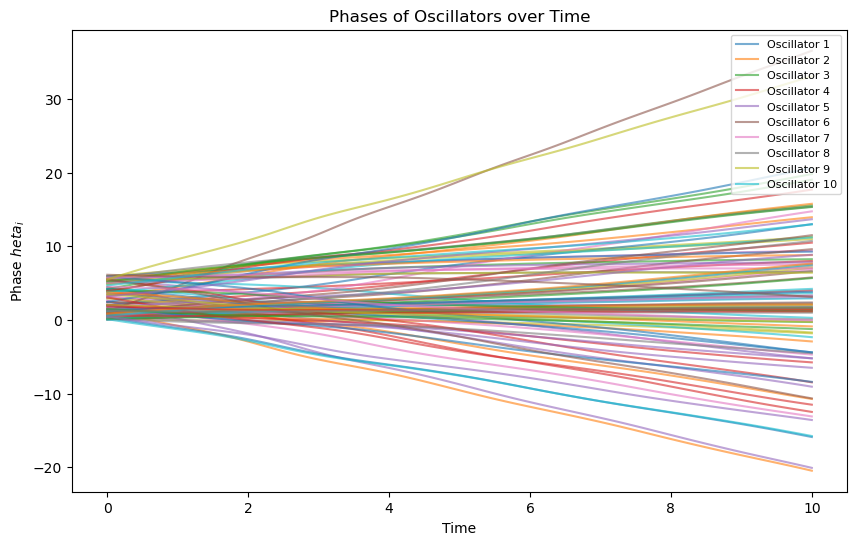

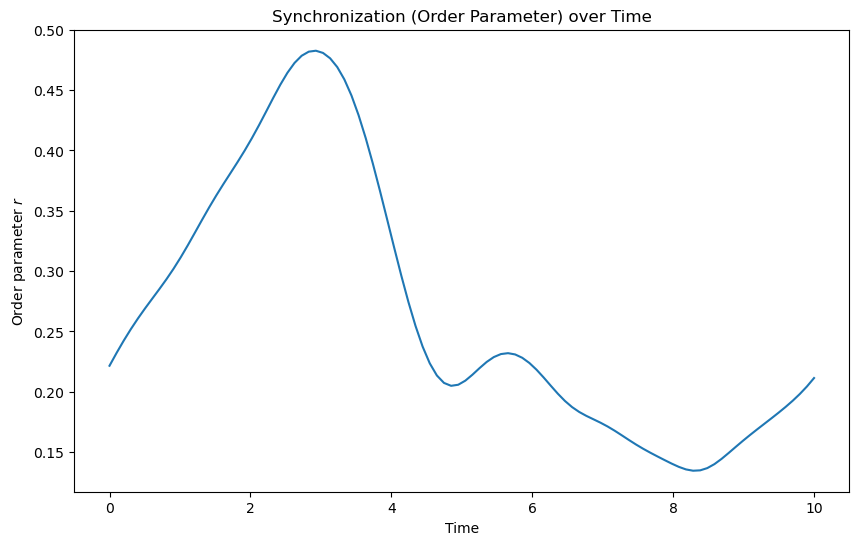

In [ ]:
# Parameters
N = 100  # number of oscillators
K = 1.0  # coupling strength
T = 10  # total time for simulation
dt = 0.1  # time step
omega = np.random.normal(0, 1, N)  # random natural frequencies (mean 0, std 1)

# Define the mean-field equation
def mean_field_eq(theta, t, K, omega, N):
    # theta: array of phases of oscillators
    # t: time variable (not used explicitly but required by odeint)
    
    # Compute the order parameter r * exp(i * Theta)
    r = np.abs(np.sum(np.exp(1j * theta)) / N)  # magnitude of the order parameter
    Theta = np.angle(np.sum(np.exp(1j * theta)) / N)  # phase of the order parameter
    
    # Compute the derivatives (d/dt of each oscillator phase)
    dtheta = omega - K * r * np.sin(theta - Theta)  # mean-field equation
    return dtheta

# Initial conditions: random initial phases for each oscillator
theta0 = np.random.uniform(0, 2 * np.pi, N)

# Time points where solution is computed
t = np.linspace(0, T, int(T / dt))

# Integrate the mean-field equations
theta = odeint(mean_field_eq, theta0, t, args=(K, omega, N))

# Visualize the results
plt.figure(figsize=(10, 6))

# Plot the phases of all oscillators over time
for i in range(N):
    plt.plot(t, theta[:, i], label=f'Oscillator {i+1}' if i < 10 else "", alpha=0.6)

plt.xlabel('Time')
plt.ylabel('Phase $\theta_i$')
plt.title('Phases of Oscillators over Time')
plt.legend(loc='upper right', fontsize=8)
plt.show()

# Compute and plot the order parameter r over time
r_values = np.abs(np.sum(np.exp(1j * theta), axis=1) / N)
plt.figure(figsize=(10, 6))
plt.plot(t, r_values, label="Order parameter r")
plt.xlabel('Time')
plt.ylabel('Order parameter $r$')
plt.title('Synchronization (Order Parameter) over Time')
plt.show()


## Assignment 1b)

This equation is part of a coupled system of oscillators which we have seen in the lecture. exp(iθ) represents the state of each oscillator in the complex plane, where the phase of the oscillator corresponds to the argument of this complex number.  r exp(𝑖Θ) is the mean field, which represents the collective behavior of all the oscillators, where r represents the overall synchronization of the network of neurons/system of oscillators, and Θ is the average phase of all the oscillators. 

## Assignment 1c)


Stable solutions exist when the natural frequencies of the different oscillators (so of the different neurons) lie within the range of Kr, which is the effective coupling strength. The dynamics of each oscillator are driven by the term Krsin(θi−Θ), which represents the force that drives oscillator i toward the average phase Θ of the system. The strength of this force is directly proportional to Kr: when Kr is large, the synchronization force is stronger, making it easier for the oscillators to synchronize. If Kr is too small, some oscillators with higher natural frequencies will be unable to synchronize. Neurons with natural frequencies outside the interval [-Kr, Kr] will fail to synchronize, as their phase difference will be too large for the coupling term to be effective. 

## Assignment 1d) step 1

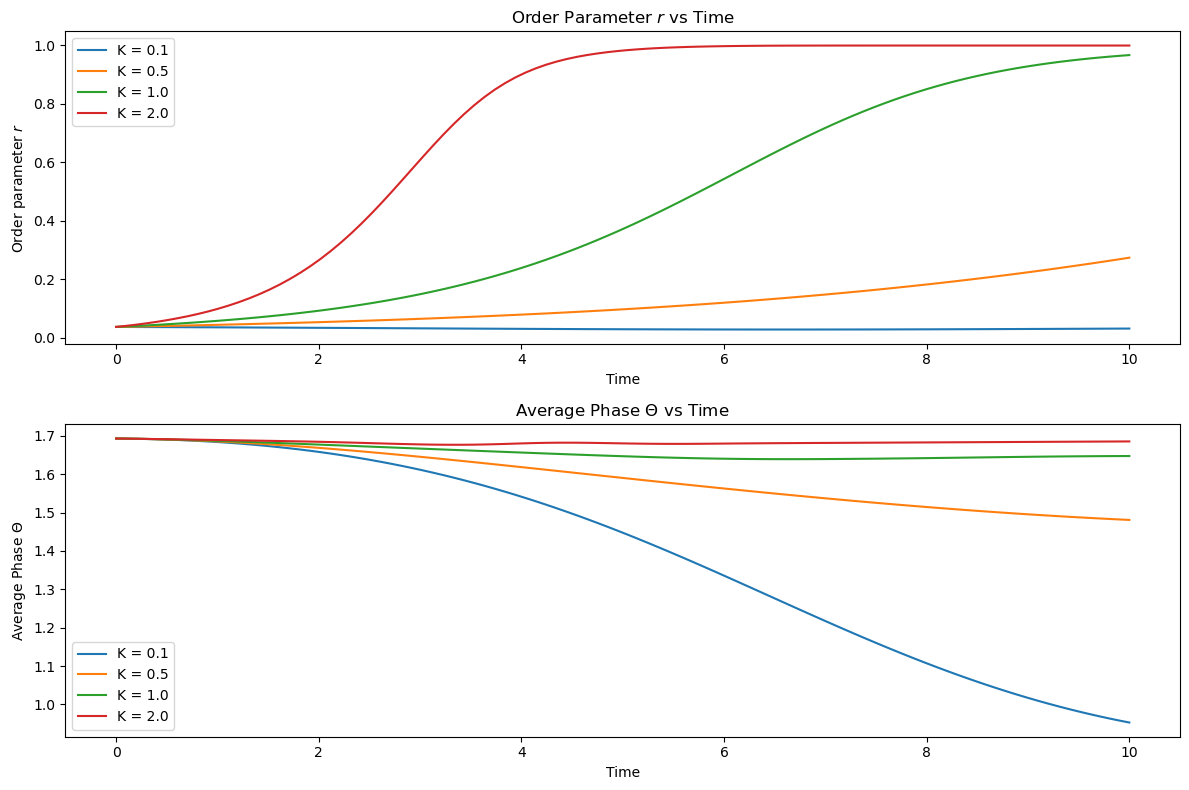

In [ ]:
#  Plot r and Θ as function of time for different values of K

# Parameters for the function
N = 1000 
R = 10
dt = 0.1

omega = np.random.normal(0, 0.1, N)

#define the mean field equation
def mean_field_eq(theta, t, K, omega, N):
    #compute the order parameter (r * exp(i * Theta))
    r = np.abs(np.sum(np.exp(1j * theta)) / N)
    Theta = np.angle(np.sum(np.exp(1j * theta)) / N)

    dtheta = omega - K * r * np.sin(theta - Theta) #mean-field equation
    return dtheta

t = np.linspace(0, T, int(T / dt))

# Initial conditions: random initial phases for each oscillator
theta0 = np.random.uniform(0, 2 * np.pi, N)

# List of different K values to use for simulation
K_values = [0.1, 0.5, 1.0, 2.0]

# Plotting setup
plt.figure(figsize=(12, 8))

# Loop over different K values
for K in K_values:
    # Integrate the mean-field equations
    theta = odeint(mean_field_eq, theta0, t, args=(K, omega, N))
    
    # Compute the order parameter r and average phase Theta over time
    r_values = np.abs(np.sum(np.exp(1j * theta), axis=1) / N)
    Theta_values = np.angle(np.sum(np.exp(1j * theta), axis=1))
    
    # Plot r(t) over time
    plt.subplot(2, 1, 1)
    plt.plot(t, r_values, label=f'K = {K}')
    plt.xlabel('Time')
    plt.ylabel('Order parameter $r$')
    plt.title('Order Parameter $r$ as a function of Time')
    plt.legend()

    # Plot Theta(t) over time
    plt.subplot(2, 1, 2)
    plt.plot(t, Theta_values, label=f'K = {K}')
    plt.xlabel('Time')
    plt.ylabel('Average Phase $\\Theta$')
    plt.title('Average Phase $\\Theta$ as a function of Time')
    plt.legend()

plt.tight_layout()
plt.show()

## Assignment 1d) step 2

The system will typically settle into a steady state after some initial transient behavior. We can compute r over time and extract its value after the system reaches a steady state. To ensure the system reaches the steady state, we can look at the convergence behavior of r(t) over time and define a time period where the value of r(t) becomes approximately constant.

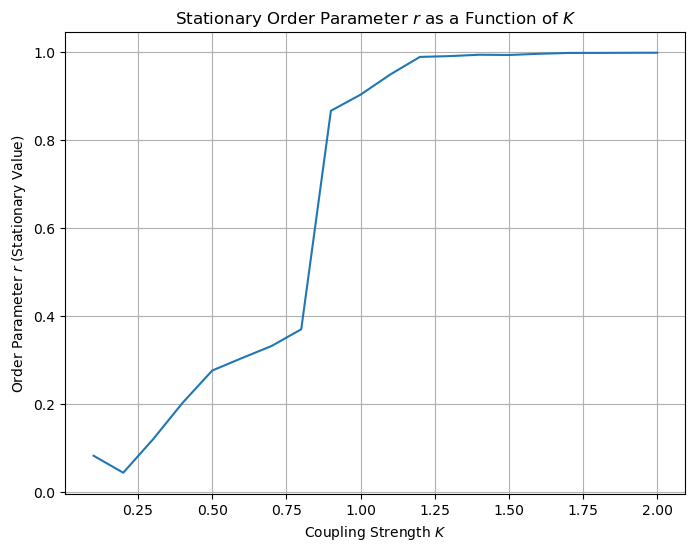

In [15]:
# Function to compute the stationary value of r for a given K
def compute_stationary_r(K):
    # Initial conditions: random initial phases for each oscillator
    theta0 = np.random.uniform(0, 2 * np.pi, N)
    
    # Solve the system of ODEs
    theta = odeint(mean_field_eq, theta0, t, args=(K, omega, N))
    
    # Compute the order parameter r over time
    r_values = np.abs(np.sum(np.exp(1j * theta), axis=1) / N)
    
    # Return the stationary value of r (after the system reaches steady state)
    # Taking the average over the last 20% of the time to estimate the steady state
    return np.mean(r_values[int(0.8 * len(r_values)):])

r_stationary = [] #list to store the stationary r values for each K

#loop over different K values and compute the stationary r value
for K in K_values:
    r_stationary.append(compute_stationary_r(K))

# Plot the stationary value of r as a function of K
plt.figure(figsize=(8, 6))
plt.plot(K_values, r_stationary)
plt.xlabel('Coupling Strength $K$')
plt.ylabel('Order Parameter $r$ (Stationary Value)')
plt.title('Stationary Order Parameter $r$ as a Function of $K$')
plt.grid(True)
plt.show()

## Assignment 1d) step 3

Locked oscillators have synchronized phases, and as a consequence, their phase doesn't change over time once they have reached a steady state: 𝜃i remains nearly constant over some time period. To identify the fraction of locked oscillators in the network we have defined, we have to find for which oscillators the phase is (nearly) constant, so the derivative of 𝜃i has to be close to zero for these oscillators.

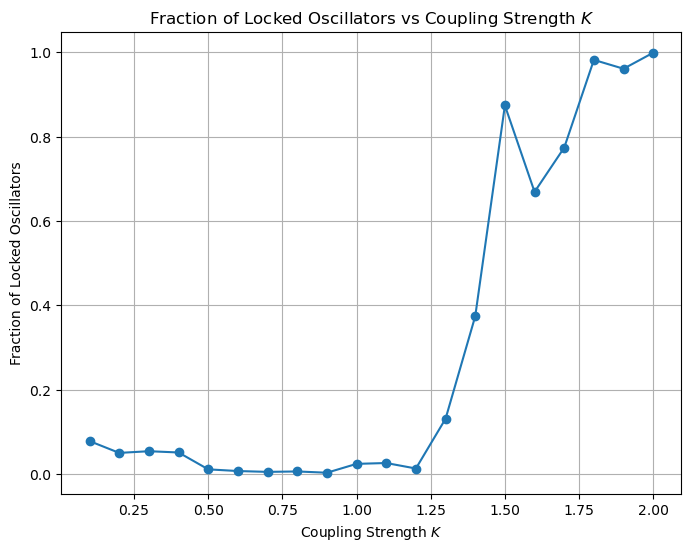

In [16]:
# Function to determine the fraction of locked oscillators for a given K
def compute_locked_fraction(K):
    # Initial conditions: random initial phases for each oscillator
    theta0 = np.random.uniform(0, 2 * np.pi, N)
    
    # Solve the system of ODEs
    theta = odeint(mean_field_eq, theta0, t, args=(K, omega, N))
    
    # Compute the phase velocities for each oscillator (derivative of phase)
    phase_velocities = np.diff(theta, axis=0) / dt  # phase velocities over time
    
    locked_count = 0
    for i in range(N):
        # Check if the phase velocity of the oscillator i is near zero over the last 20% of time
        if np.all(np.abs(phase_velocities[int(0.8 * len(phase_velocities)): , i]) < 0.01):
            locked_count += 1
    
    # Return the fraction of locked oscillators
    return locked_count / N

# List to store the fraction of locked oscillators for each K
locked_fractions = []

# Loop over different K values and compute the fraction of locked oscillators
for K in K_values:
    locked_fractions.append(compute_locked_fraction(K))

# Plot the fraction of locked oscillators as a function of K
plt.figure(figsize=(8, 6))
plt.plot(K_values, locked_fractions, marker='o')
plt.xlabel('Coupling Strength $K$')
plt.ylabel('Fraction of Locked Oscillators')
plt.title('Fraction of Locked Oscillators vs Coupling Strength $K$')
plt.grid(True)
plt.show()

In the figure we can see that the higher the coupling strength K, the more locked oscillators we find and at some point it stabilizes near 0. This makes sense, because  At small values of K, there is a weak coupling strength between the neurons, and most of them will remain desynchronized. Therefore, the fraction of locked oscillators will be low. As K increases, the oscillators will become more strongly coupled, and more of them will synchronize/become locked. Around K = 1.25, we see a transition period, where we all of a sudden transition from a lower number of locked oscillators to a much higher number. This can also be seen in the previous plots we produced, and most likely corresponds to the onset of synchronization of the network